In [1]:
import tensorflow as tf
import overdrive as od
import matplotlib.pyplot as plt

In [2]:
def visualize_dataset(ds):
    plt.figure(figsize=(15, 15))
    for i, img in enumerate(ds):
        plt.subplot(3, 3, i+1)
        plt.imshow(img[0])

# Loading data

In [4]:
file_names = ['samples/sample.jpg']

dataset = tf.data.Dataset.from_tensor_slices(file_names)
dataset = dataset.map(tf.io.read_file)
dataset = dataset.map(tf.io.decode_jpeg)
dataset = dataset.map(lambda x: tf.cast(x, dtype=tf.float32) / 255.)
dataset = dataset.repeat(9)
dataset = dataset.batch(1, drop_remainder=True)

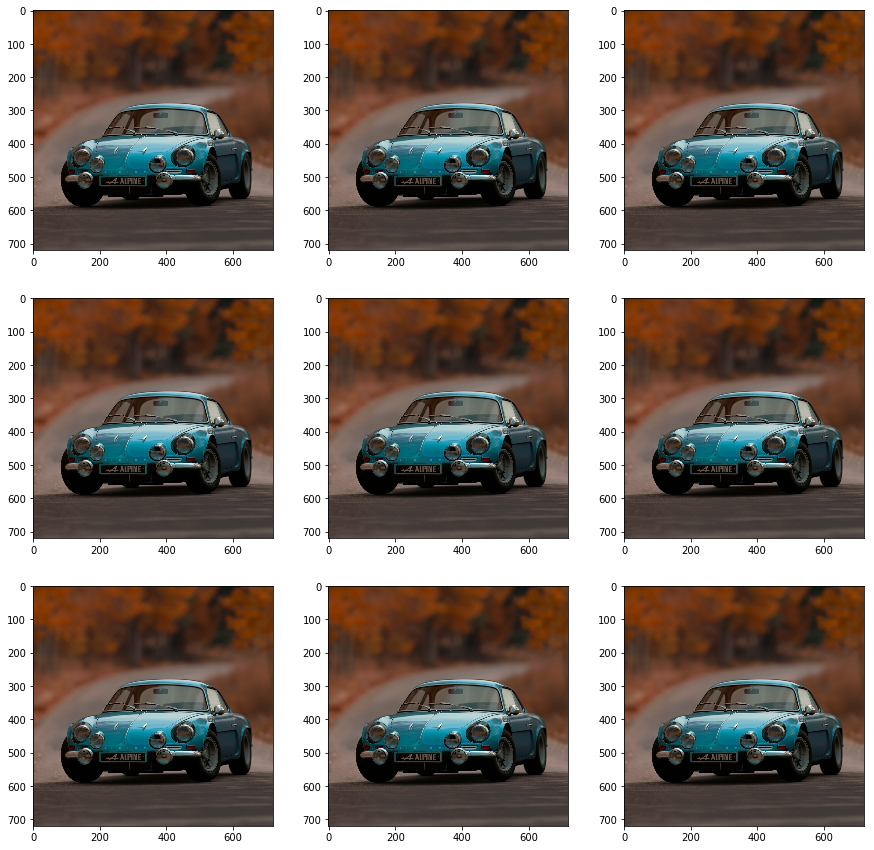

In [5]:
visualize_dataset(dataset)

# Rotations

## NinetyRotator

Randomly rotates a batch of images $90k^{\circ}$. Note that this can only be used with batches of square images (height = width).

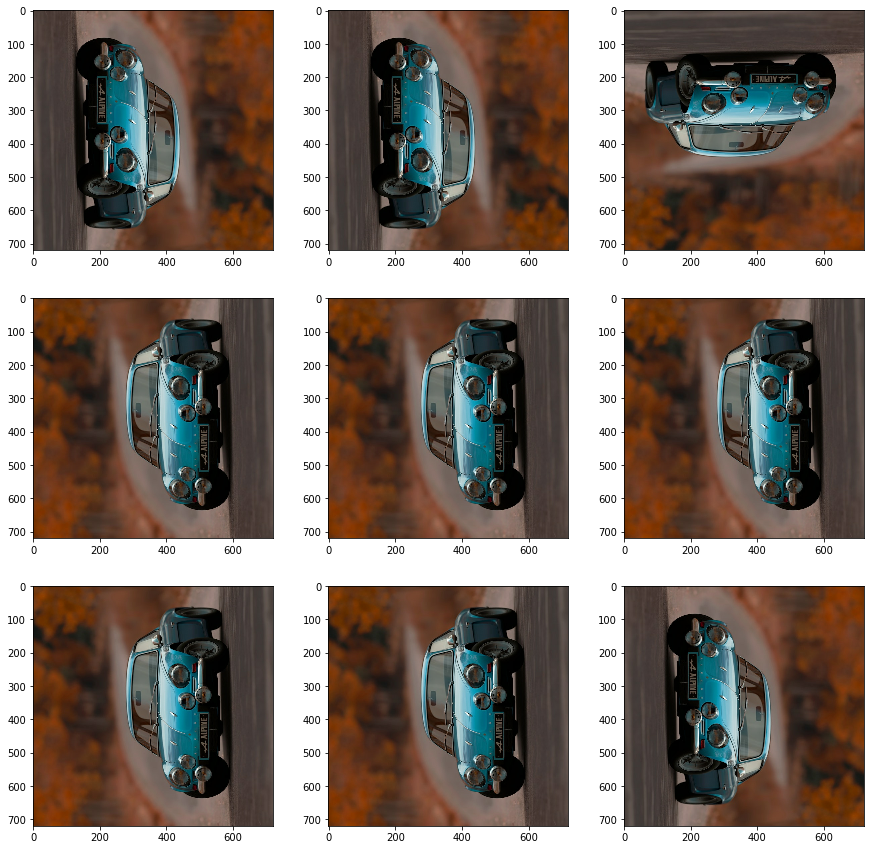

In [6]:
rotator90 = od.NinetyRotator(probability=.75, labeled=False)

rotated_dataset = dataset.map(rotator90)

visualize_dataset(rotated_dataset)

## FreeRotator

*Uses Tensorflow-addons*

Randomly rotates images by an angle within a range $(-d, +d)$.

W0603 09:52:37.671852 140275485959936 tf_logging.py:161] Entity <function image_projective_transform_v2 at 0x7f93e52e4730> could not be transformed and will be staged without change. Error details can be found in the logs when running with the env variable AUTOGRAPH_VERBOSITY >= 1. Please report this to the AutoGraph team. Cause: Unexpected error transforming <function image_projective_transform_v2 at 0x7f93e52e4730>. If you believe this is due to a bug, please set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output when filing the bug report. Caused by: Unable to locate the source code of <function image_projective_transform_v2 at 0x7f93e52e4730>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: 

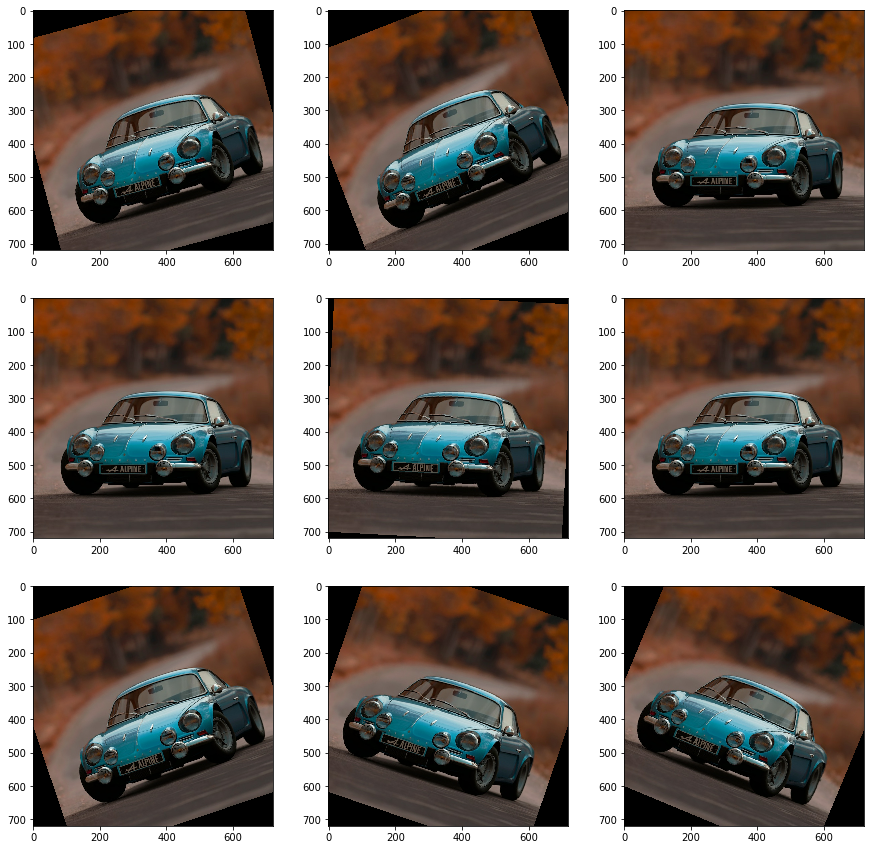

In [7]:
freerotator = od.FreeRotator(probability=.75, labeled=False, degree=30)

rotated_dataset = dataset.map(freerotator)

visualize_dataset(rotated_dataset)

# Color-based Augmentations

## ChannelDisturber

Multiplies RGB pixels for each image by a random vector in $(1-f, 1+f)^3$ creating a different color/white balance.

W0603 09:52:41.520936 140275485959936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0603 09:52:41.557248 140275485959936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0603 09:52:41.595227 140275485959936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0603 09:52:41.634340 140275485959936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0603 09:52:41.670031 140275485959936 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


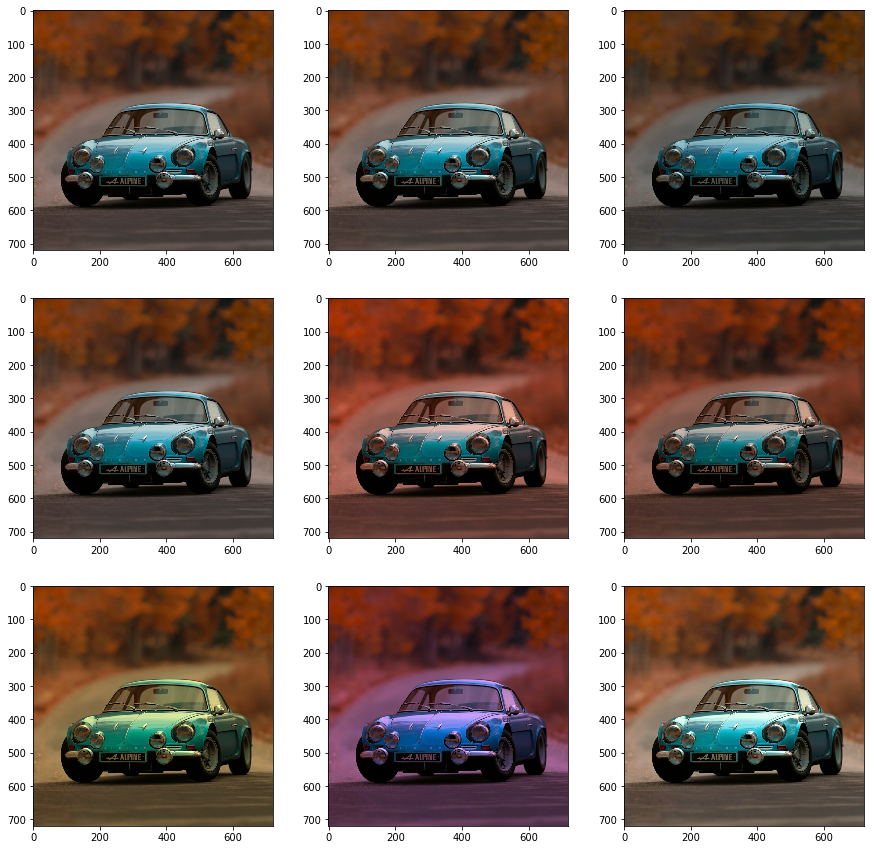

In [8]:
channeldist = od.ChannelDisturber(probability=.8, labeled=False, factor=.25)

color_dataset = dataset.map(channeldist)

visualize_dataset(color_dataset)

## RandomSaturator

Multiplies the image saturation by a random factor in $(minfactor, maxfactor)$.

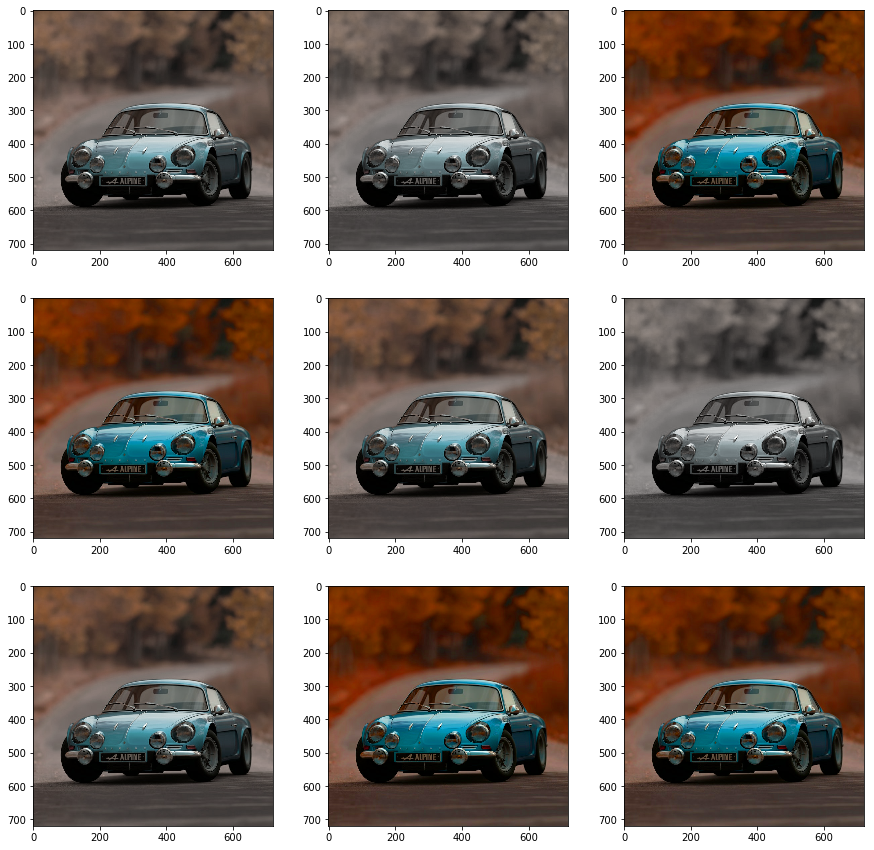

In [9]:
saturator = od.RandomSaturator(probability=.8, labeled=False, minfactor=.0, maxfactor=2.)

color_dataset = dataset.map(saturator)

visualize_dataset(color_dataset)

# Cropping

## RelativeCropper

Crops a random patch of the image with a random area in $(minarea, 1.)$ relative to the size of the image, then resizes the images to a target size.

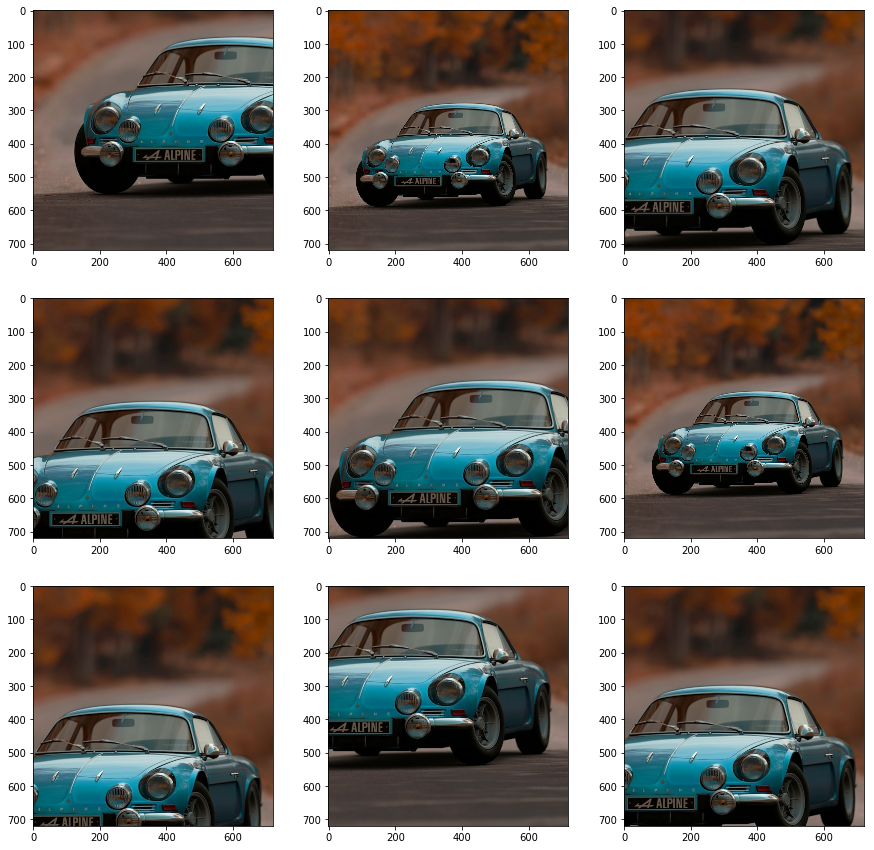

In [10]:
cropper = od.RelativeCropper(probability=.75, labeled=False, minarea=.66, target_size=(720, 720))
cropped_dataset = dataset.map(cropper)
visualize_dataset(cropped_dataset)

## AbsoluteCropper

Randomly crops fixed-size patches from in the input image given a specific size. It doesn't allow probability because otherwise there will be differences in size across batches.

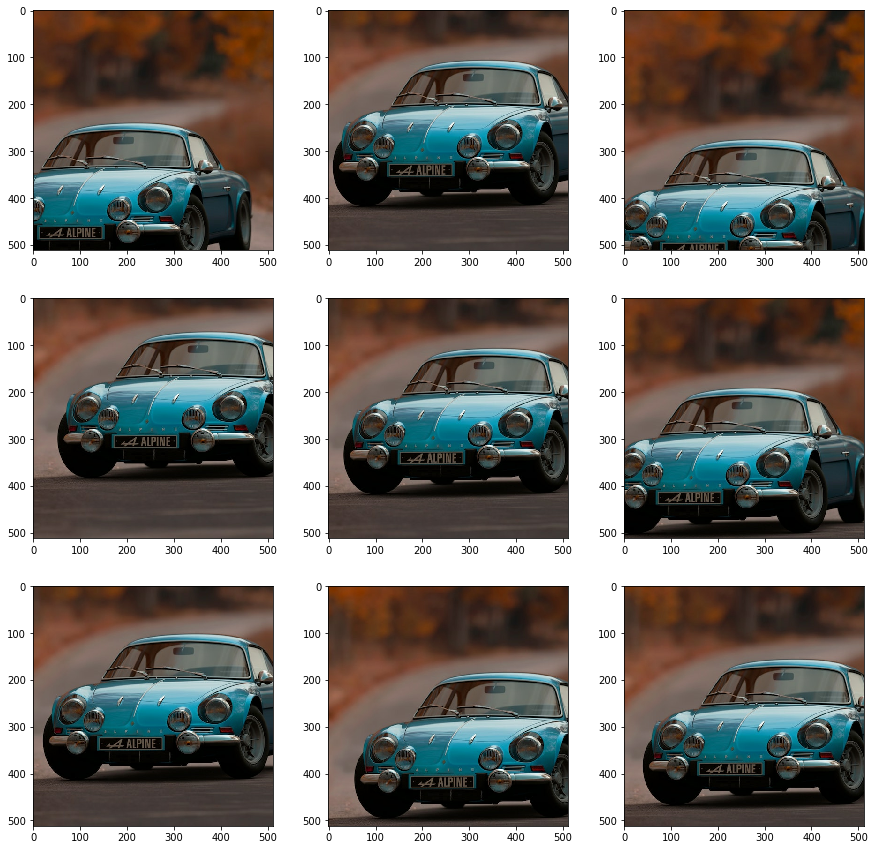

In [11]:
cropper = od.AbsoluteCropper(labeled=False, target_size=(512, 512))
cropped_dataset = dataset.map(cropper)
visualize_dataset(cropped_dataset)

# Perspective transform

## Tilter

*Uses Tensorflow-addons*

Tilts the images randomly forward or backward.

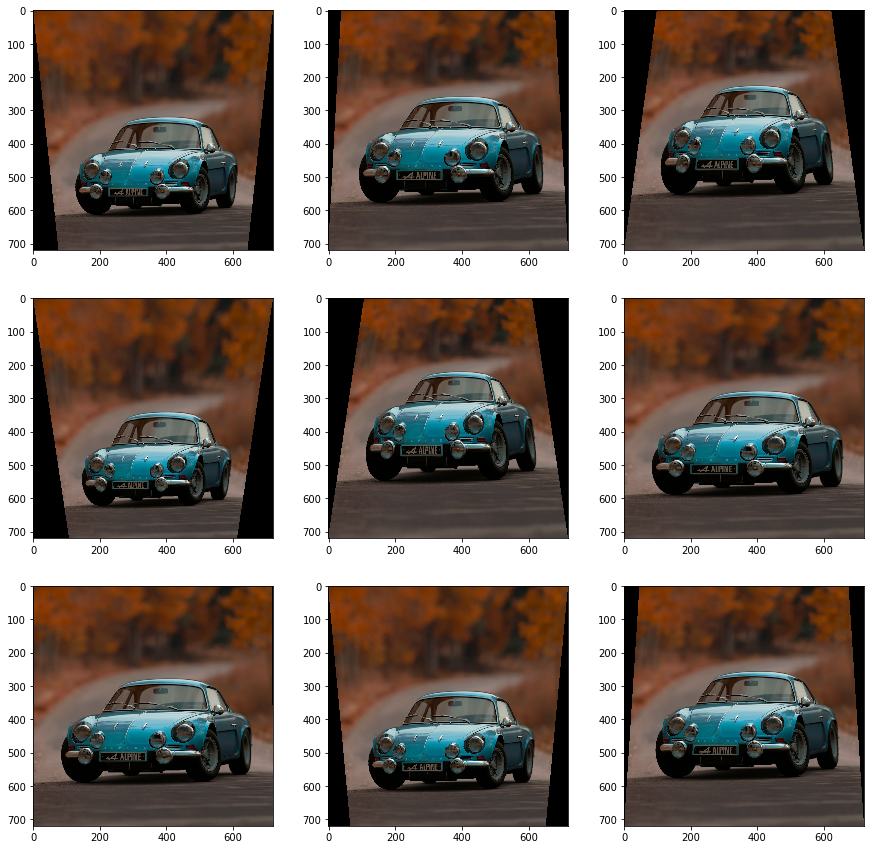

In [12]:
tilter = od.Tilter(probability=.75, labeled=False, maxdelta=.25, size=720, batch_size=1)
tilted_dataset = dataset.map(tilter)
visualize_dataset(tilted_dataset)